# Mentoría 'de cómo clasificar en géneros a las canciones'
## Práctico I : Análisis de features de audio

**Consideraciones:**
- Se evalúa el estilo y prolijidad del código.
- Se permite hacer trabajo extra, siempre y cuando las actividades básicas estén resueltas.

### Librerías

In [ ]:
!pip3 install spotipy
!pip3 install pandas

# Agregar las librerías extra que se utilicen en esta celda y la siguiente

### Dependencias y acceso al API

In [ ]:
import pandas as pd
import numpy as np
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import seaborn as sns
from matplotlib import pyplot as plt

client_id = '46b333d567314a89a6254b6c6b054be6'
client_secret = '9d922c3613e441518349dcf55f7d5853'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

### 1) Plantear una pregunta que quieran responder con estos datos

Las preguntas pueden ser por ejemplo: 
- ¿Por qué este artista destaca dentro de su género?
- ¿Por qué no lo hace?
- ¿Por qué un género musical es más escuchado que otro?

Sin embargo, pueden usar cualquier afirmación que hayan leído en internet y que se pueda responder con los datos de este trabajo para validarla o rechazarla.

### Como evolucionaron las canciones de The Beatles a traves de los años

### 2) Obtener datos para responder la pregunta

Para esto hay que hacer pedidos a la API para obtener una lista de canciones de sus artistas, de las cuáles se obtienen sus features de audio como en este [ejemplo](https://developer.spotify.com/console/get-audio-features-track/?id=17VP4tofJ3evJbtY8Tk1Qi) de la versión web de la API. Una vez obtenidos los datos, seleccionar un subconjunto de 5 o 6 features de audio y agrupar los datos en un [DataFrame de pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

**Recomendación** : Usar un dataframe para su artista y otro para la competencia si es que eligierone esa opción, les va a ahorrar tiempo.

**Aclaración** : Si plantearon una pregunta que no requiera los datos de la consigna, obtengan esos datos.

Obtenemos una lista de todos los discos de estudio que nos interesa analizar

In [ ]:
beatles_albums = sp.artist_albums('spotify:artist:3WrFJ7ztbogyGnTHbHJFl2', limit=50, country='AR')
beatles_studio_albums = []
for album in beatles_albums['items']:
  if ('1960-01-01' < album['release_date'] < '1970-12-31' 
      and album['album_type'] == 'album' 
      and 'Deluxe' not in album['name']):
    beatles_studio_albums.append({'uri': album['uri'], 'name': album['name'], 'release_date': album['release_date']})
beatles_studio_albums

[{'name': 'Let It Be (Remastered)',
  'release_date': '1970-05-08',
  'uri': 'spotify:album:0jTGHV5xqHPvEcwL8f6YU5'},
 {'name': 'Abbey Road (Remastered)',
  'release_date': '1969-09-26',
  'uri': 'spotify:album:0ETFjACtuP2ADo6LFhL6HN'},
 {'name': 'Yellow Submarine (Remastered)',
  'release_date': '1969-01-17',
  'uri': 'spotify:album:1gKZ5A1ndFqbcrWtW85cCy'},
 {'name': 'The Beatles (Remastered)',
  'release_date': '1968-11-22',
  'uri': 'spotify:album:1klALx0u4AavZNEvC4LrTL'},
 {'name': 'Magical Mystery Tour (Remastered)',
  'release_date': '1967-11-27',
  'uri': 'spotify:album:2BtE7qm1qzM80p9vLSiXkj'},
 {'name': "Sgt. Pepper's Lonely Hearts Club Band (Remastered)",
  'release_date': '1967-06-01',
  'uri': 'spotify:album:6QaVfG1pHYl1z15ZxkvVDW'},
 {'name': 'Revolver (Remastered)',
  'release_date': '1966-08-05',
  'uri': 'spotify:album:3PRoXYsngSwjEQWR5PsHWR'},
 {'name': 'Rubber Soul (Remastered)',
  'release_date': '1965-12-03',
  'uri': 'spotify:album:50o7kf2wLwVmOTVYJOTplm'},
 {'nam

In [ ]:
beatles_df = pd.DataFrame(columns=('album_name', 'release_date', 'song_uri', 'song_name', 
                                   'duration_ms', 'acousticness',
                                   'danceability', 'energy', 'valence'))
sp.album_tracks(album_id='0jTGHV5xqHPvEcwL8f6YU5')
for album in beatles_studio_albums:
  album_songs = sp.album_tracks(album_id=album['uri'])

  for song in album_songs['items']:
    if ('AR' in song['available_markets']):
      song_features = sp.audio_features(tracks=[song['uri']])
      song = {'album_name': album['name'], 'release_date': album['release_date'],'song_uri': song['uri'], 
              'song_name': song['name'], 'duration_ms':song['duration_ms'], 
              'acousticness': song_features[0]['acousticness'],
              'danceability': song_features[0]['danceability'],
              'energy': song_features[0]['energy'],
              'valence': song_features[0]['valence']
              }
      beatles_df = beatles_df.append(song, ignore_index=True)

In [ ]:
beatles_df

,album_name,release_date,song_uri,song_name,duration_ms,acousticness,danceability,energy,valence
0,Let It Be (Remastered),1970-05-08,spotify:track:0CaBBQsaAiRHhiLmzi7ZRp,Two Of Us - Remastered 2009,216813,0.0974,0.726,0.702,0.931
1,Let It Be (Remastered),1970-05-08,spotify:track:4OUmlC67FoPLvQNuE5C7kF,Dig A Pony - Remastered 2009,235000,0.4720,0.538,0.478,0.527
2,Let It Be (Remastered),1970-05-08,spotify:track:4dkoqJrP0L8FXftrMZongF,Across The Universe - Remastered 2009,228133,0.3610,0.257,0.412,0.858
3,Let It Be (Remastered),1970-05-08,spotify:track:2BMqay80iBzZTa608Y1eG1,I Me Mine - Remastered 2009,145586,0.1790,0.291,0.638,0.525
4,Let It Be (Remastered),1970-05-08,spotify:track:0eRyOunOVBChlXxIvqwOxH,Dig It - Remastered 2009,50466,0.6590,0.540,0.489,0.670
...,...,...,...,...,...,...,...,...,...
188,Please Please Me (Remastered),1963-03-22,spotify:track:2VmB1rF9FtfKUmFHDVnq8Q,Baby It's You - Remastered 2009,160520,0.7780,0.608,0.494,0.879
189,Please Please Me (Remastered),1963-03-22,spotify:track:7Aobt67JnaF7qN8jCCKvHq,Do You Want To Know A Secret - Remastered 2009,117013,0.6080,0.673,0.349,0.609
190,Please Please Me (Remastered),1963-03-22,spotify:track:7fh53ta3vAOGJMQ4i5tCHe,A Taste Of Honey - Remastered 2009,123480,0.6980,0.420,0.372,0.412
191,Please Please Me (Remastered),1963-03-22,spotify:track:4dessGxnKXmTbHPhVgqODq,There's A Place - Remastered 2009,110493,0.6290,0.455,0.582,0.927


In [ ]:
beatles_df.dtypes

album_name       object
release_date     object
song_uri         object
song_name        object
duration_ms      object
acousticness    float64
danceability    float64
energy          float64
valence         float64
dtype: object

In [ ]:
beatles_df['release_date'] = beatles_df['release_date'].astype('datetime64[ns]')

In [ ]:
features_grouped = beatles_df.groupby(['album_name', 'release_date'])['danceability', 'acousticness', 'energy', 'valence'].agg(['mean'])

features_grouped = features_grouped.sort_values(by=['release_date']).reset_index()
features_grouped

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,album_name,release_date,danceability,acousticness,energy,valence
,,,mean,mean,mean,mean
0,Please Please Me (Remastered),1963-03-22,0.547929,0.575500,0.599786,0.787143
1,With The Beatles (Remastered),1963-11-22,0.500357,0.417071,0.676143,0.871429
2,A Hard Day's Night (Remastered),1964-07-10,0.601462,0.377900,0.609538,0.761462
3,Beatles For Sale (Remastered),1964-12-04,0.592286,0.525000,0.596429,0.812000
4,Help! (Remastered),1965-08-06,0.528000,0.295386,0.610929,0.726714
5,Rubber Soul (Remastered),1965-12-03,0.587786,0.150806,0.539357,0.716357
6,Revolver (Remastered),1966-08-05,0.482429,0.406135,0.530571,0.626171
7,Sgt. Pepper's Lonely Hearts Club Band (Remaste...,1967-06-01,0.515385,0.298762,0.482538,0.628385
8,Magical Mystery Tour (Remastered),1967-11-27,0.466909,0.311273,0.486545,0.473618


### 3) Hacer un gráfico de estilo [radar chart](https://en.wikipedia.org/wiki/Radar_chart)  comparando a su artista o banda con 'la competencia'
En esta parte tienen que hacer los gráficos tomando como parámetros las features de audio que eligieron. Pueden usar la librería que quieran para hacer los gráficos.

**Recomendaciones** : 
- Hacer ambos gráficos en una misma figura.
- Antes de graficar, obtener los valores medios o medianos para los valores de las features. 
- Chequear los rangos de valores para cada feature antes de hacer los gráficos.

**Aclaración**: pueden usar otro tipo de gráfico si lo consideran particularmente útil para resolver su pregunta.

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

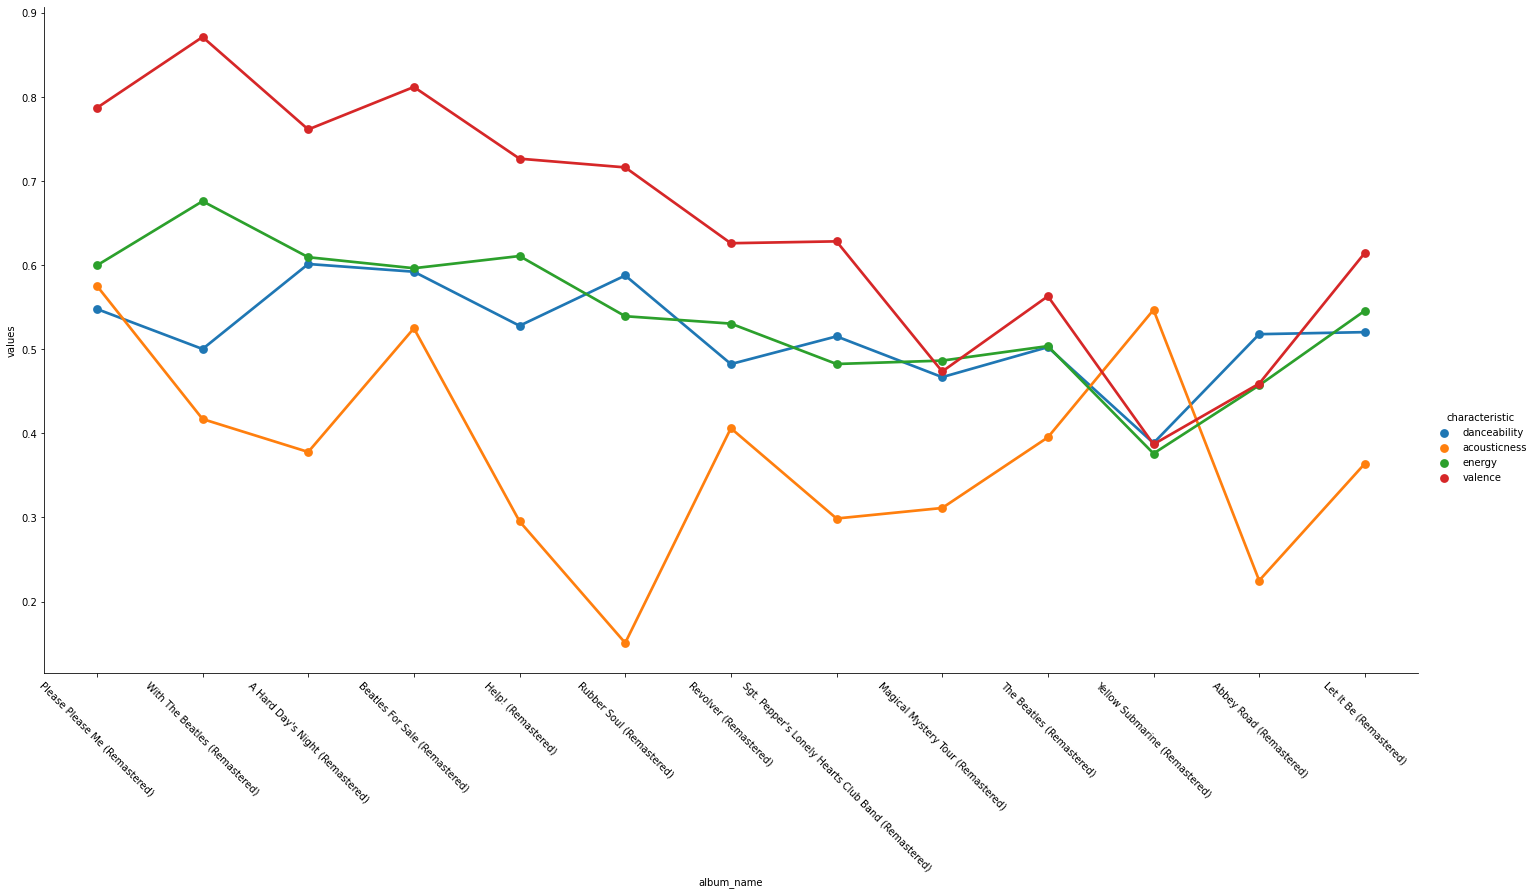

In [ ]:
dataframe_graph = features_grouped.drop(['release_date'], 1)
dataframe_graph = dataframe_graph.melt('album_name', var_name='characteristic',  value_name='values')

#plt.figure(figsize=(200,200))
g = sns.factorplot(x="album_name", y="values", hue='characteristic', data=dataframe_graph, height=10, aspect=2)
plt.xticks(rotation=-45)

In [ ]:

dataframe_graph_fixed = features_grouped.drop(features_grouped.index[10])
dataframe_graph_fixed.at[12, 'release_date'] = '1969-02-01'
dataframe_graph_fixed['release_date'] = dataframe_graph_fixed['release_date'].astype('datetime64[ns]')

dataframe_graph_fixed = dataframe_graph_fixed.sort_values(by=['release_date']).reset_index()
dataframe_graph_fixed = dataframe_graph_fixed.drop(['release_date'], 1)
dataframe_graph_fixed = dataframe_graph_fixed.drop(['index'], 1)
dataframe_graph_fixed

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,album_name,danceability,acousticness,energy,valence
,,mean,mean,mean,mean
0,Please Please Me (Remastered),0.547929,0.575500,0.599786,0.787143
1,With The Beatles (Remastered),0.500357,0.417071,0.676143,0.871429
2,A Hard Day's Night (Remastered),0.601462,0.377900,0.609538,0.761462
3,Beatles For Sale (Remastered),0.592286,0.525000,0.596429,0.812000
4,Help! (Remastered),0.528000,0.295386,0.610929,0.726714
5,Rubber Soul (Remastered),0.587786,0.150806,0.539357,0.716357
6,Revolver (Remastered),0.482429,0.406135,0.530571,0.626171
7,Sgt. Pepper's Lonely Hearts Club Band (Remaste...,0.515385,0.298762,0.482538,0.628385
8,Magical Mystery Tour (Remastered),0.466909,0.311273,0.486545,0.473618


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

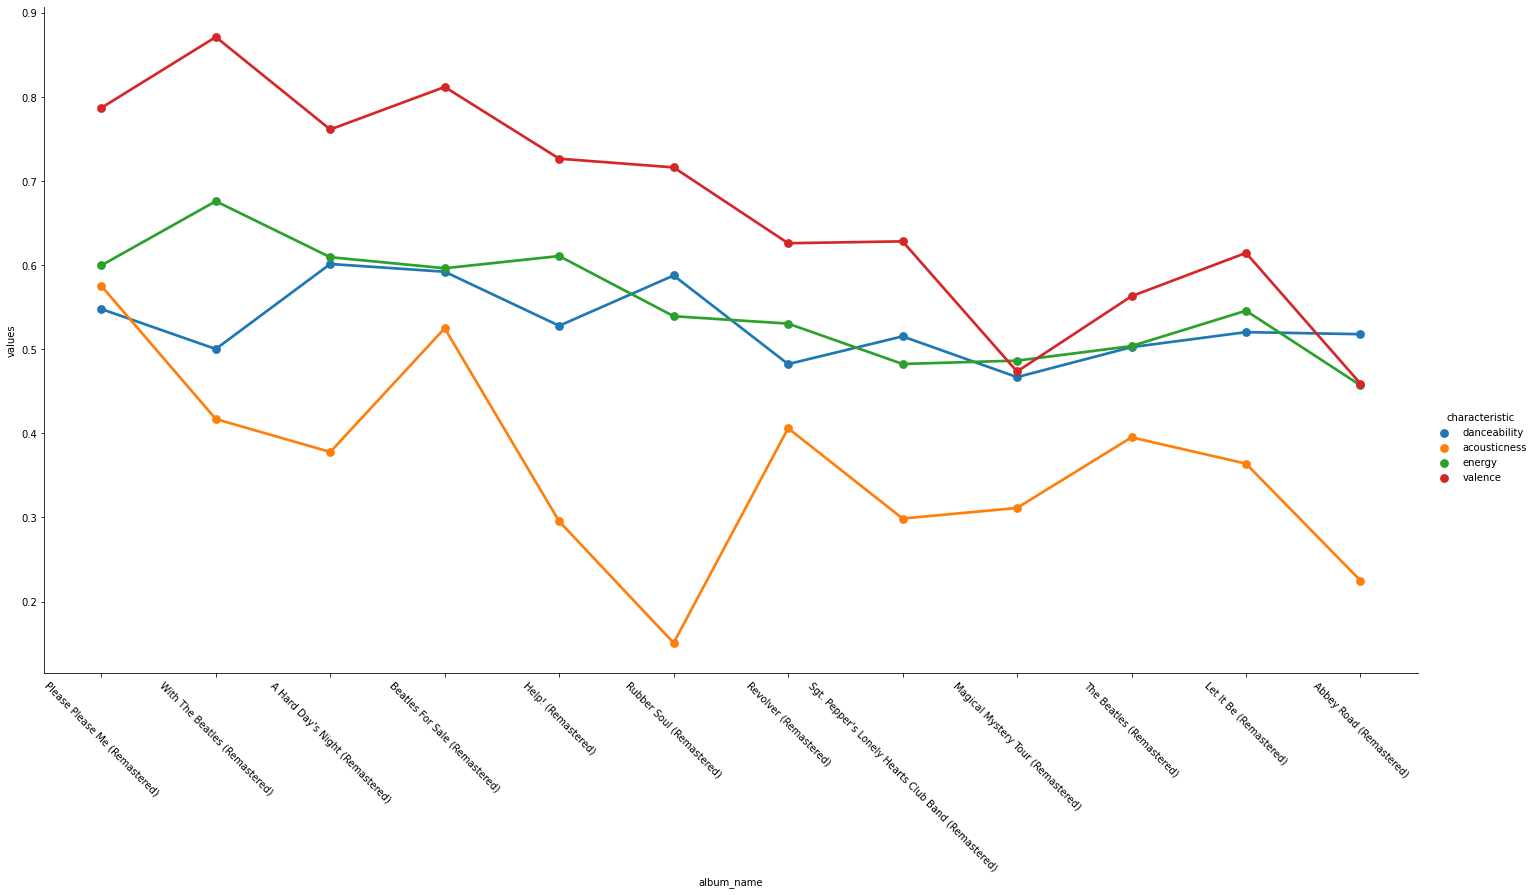

In [ ]:
dataframe_graph_fixed = dataframe_graph_fixed.melt('album_name', var_name='characteristic',  value_name='values')

g = sns.factorplot(x="album_name", y="values", hue='characteristic', data=dataframe_graph_fixed, height=10, aspect=2)
plt.xticks(rotation=-45)

### 4) Escribir un informe

Este informe tiene que describir qué datos que obtuvieron, el volumen de estos (# de canciones del artista, # de canciones de la competencia, etc), una explicación de cómo estos se relacionan con la pregunta planteada, cómo ayudan a responderla y los resultados que obtuvieron. Usar la celda de abajo con formato markdown.

* Explicar motivación
* Describir metodologia
* Obtencion de datos
* Limpieza de datos
* Análisis
* Conclusiones

## Informe

### Alumno: Daniel Cattaneo

### Motivación del trabajo

Siendo un gran fanatico de los Beatles uno conoce la evolucion de esta banda a traves de los años, sabiendo que sufrió grandes cambios que se ven influenciados por las experiencias de los musicos y el contexto mundial en que se encontraba.
Las preguntas que surgen son las siguientes:
* ¿Se podría analizar dicha evolución utilizando las características que Spotify nos brinda de cada canción?
* ¿Se ven reflejadas los eventos históricos en las características de las canciones de la banda?

### Descripción de la metodología

Para poder responder las preguntas planteadas se realizarán los siguientes pasos:
1. Obtencion de datos relevantes
1. Limpieza de datos 
1. Análisis de datos.
1. Conclusiones

### Obtención datos 
Para la obtención de los datos se hizo uso de la API publica de Spotify, que brinda distintos métodos para la obtencion de informacion de las canciones en esta plataforma.

En un principio se seleccionaron los albumes relevantes para este análisis, esto significa que solo haremos uso los discos de estudio grabados y publicados mientras la banda estaba activa. Descartando todas las reediciones, los compilatorios y versiones especiales de discos que salieron después.

Habiendo seleccionado esos discos consultamos la información de las canciones de estos y también las features que nos ofrece Spotify.
Siendo 13 discos de estudios editados, sumando una cantidad de 193 canciones en total.

### Limpieza de datos

Habiendo obtenido las canciones a analizar procedemos a elegir los datos que nos serán relevantes para nuestro análisis.

De todas las features que nos ofrece Spotify, se seleccionaron las siguientes:
* Danceability: Describe que tan bailable es una canción.
* Acousticness: Describe que tan acústica es.
* Energy: Mide la intensidad de la canción, que tan rapida, fuerte y/o energética es.
* Valence: Mide la positividad u optimismo que transmite la canción. Es decir que tan alegre es.

En el siguiente artículo se menciona en mas detalle el significado de estas características:
* [What do Spotify’s audio features tell us about this year’s Eurovision Song Contest?](https://https://medium.com/@boplantinga/what-do-spotifys-audio-features-tell-us-about-this-year-s-eurovision-song-contest-66ad188e112a)

Se seleccionaron esas características porque son las que mejor no ayudarán a responder las preguntas planteadas, analizando si la tensión en la banda afectó en que tan optimistas son las canciones, o si las canciones mantuvieron el mismo nivel de bailabilidad.
Sumado a que las características elegidas tienen todas la misma escala (del 0 al 1) por lo que su representación en graficas se facilita.


### Análisis

Para poder realizar el análisis deseado se comenzó agrupando a las canciones por el disco en que fueron lanzadas. Esto nos permite poder obtener una métrica agrupada de las canciones que nos permite compararlas en orden de fecha en que fueron emitidas. 

Obtuvimos una media de las características de las canciones agrupadas en el disco en que fueron lanzadas y lo graficamos.

El grafico obtenido fue el siguiente:
![Primera grafica de análisis](https://drive.google.com/uc?id=1hRFG71XDTuKQh7qoJ8cNZa9Bb3SAikLU)

A partir de esta primera grafica podemos observar ciertas características remarcables.

En primer lugar, vemos una clara tendencia descendiente de la valencia a medida que avanza el tiempo. Fenómeno que podría ser explicado como la evolución de la banda hacia un sonido mas maduro y serio, separándose del pop bailable que caracterizó a la banda en sus inicios, hacia el sonido mas rockero y duro en los últimos discos.

En cuanto a la danceability y energy se observa una evolución similar pero no tan marcado.

Mirando con mas profundidad el gráfico se observa una disrupción en la tendencia en el disco Yellow Submarine de todas las características, lo que nos llevó a analizar este disco en particular y qué es lo que lo hace tan distinto a los demás. Investigando sobre las circusntancias en que fue lanzado el disco se descubrió que fue lanzado como la banda de sonido de una película de animación que la banda no consideraba importante, y que además usaron canciones de segunda categoría, reservando las canciones que mas les gustaban a los lanzamientos principales. Es por esto que consideramos que no es relevante para el análisis y va a ser descartado.

Y finalmente la otra disrupción observaba es que los ultimos dos discos invierten la tendencia que ocurría en todos los discos anteriores. Esto llevó a una investigación histórica de estos discos en donde se descubrió que estos discos fueron grabados en el orden inverso en que fueron lanzados, por lo que sería justo invertir su orden.

Habiendo estos cambios la grafica quedaría de la siguiente manera:
![Segunda grafica de análisis](https://drive.google.com/uc?id=1p_3tPGBJBgGkyv7hKvxg3LgC6wt8R0u6)


### Conclusión

Habiendo analizado las caracteristicas de las canciones de la banda a traves del tiempo se concluye lo siguiente:

En principio, se ve reflejado como el sonido de la banda en sus inicios es mas alegre y bailable. A medida que la banda va creciendo en popularidad y las presiones son mayores vemos como va mutando en canciones menos alegres, ni no tan bailables. 

Finalmente podemos agregar que la acousticness no sigue un patrón tan claro como los otros indicadores, esto se puede explicar debido a que en los discos intermedios, corresponden a un intervalo de mucha experimentación de la banda con sonidos mas orquestrales, orientales y experimentales. Es por esto que discos como, Rubber Soul, o Saergent Peppers tienen valores bajos. Pero a medida que pasan los años volvieron a la simpleza de la formación original, sin sonidos excéntricos y con un retorno a los instrumentos acústicos.

Podríamos decir que este análisis nos permitió responder la pregunta plateada originalmente, es decir, que se puede observar una correlación entre la evolución historica de la banda con las características de sus canciones.


